**WebScrapping Project**

**For Mobiles from Flipkart.com**

In [1]:
! pip install fake_useragent 

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=57d54dc203cc962733e87650cb4f133d866e82f8571a4cc2c0f23aac6f0d6541
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built fake-useragent


In [1]:
# Import required Libraries
import requests
import bs4
from bs4 import BeautifulSoup

from fake_useragent import UserAgent
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Initialization

count = 0  #Initialize search row count
products = []*100  #list to store the name of the product
prices = []  #list to store the price of the product
ratings = []   #list to store rating of the product

#specifications = []

ram = []   #List to store ram specifications of the product
display = []   #List to store display specifications of the product
camera = []    #List to store os specifications of the product
battery = []    #List to store hdd specifications of the product
cpu = []   #List to store CPU specifications of the product

df = pd.DataFrame()   ##Initializing the dataframe

In [3]:
user_agent = UserAgent()   ##Dummy user agent

In [4]:
product_name = 'mobiles'  #search for mobiles

In [5]:
for i in range(1,4):   ##limiting the search only to 3 pages out of 1000 pages
    url = "https://www.flipkart.com/search?q={0}&page={1}"
    url = url.format(product_name,i)

    ##getting the response from the page using the get method of requests module
    page = requests.get(url, headers={"user-agent": user_agent.chrome})

    ##storing the content of the page in a variable
    html = page.content

    ## Creating BeautifulSoup Object
    page_soup = bs4.BeautifulSoup(html, "html.parser")

    ##Decoding the tags
    for containers in page_soup.findAll('a', {'class':'_1fQZEK'}):
        name = containers.find('div', attrs={'class':'_4rR01T'})
        price = containers.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating = containers.find('div', attrs={'class':'_3LWZlK'})
    
        specification = containers.find('div', attrs={'class':'fMghEO'})
        ## splitting integrated specification into individual
        for col in specification:
            col = col.find_all('li', attrs={'class':'rgWa7D'})
            ramt = col[0].text
            displayt = col[1].text
            camerat = col[2].text
            batteryt = col[3].text
            cput =  col[4].text

                          
            products.append(name.text)  ##add product name to list
            prices.append(price.text)

            #specifications.append(specification.text) if type(specification) == bs4.element.Tag  else specifications.append('NaN')
            
            ram.append(ramt)
            display.append(displayt)
            camera.append(camerat)
            battery.append(batteryt)
            cpu.append(cput)

            ratings.append(rating.text) if type(rating) == bs4.element.Tag  else ratings.append('NaN')  ##Add rating to the list
            count = count + 1    #increment row count

## create a dataframe with the structured data from all searched rows
df = pd.DataFrame({'Product Name':products, 'Price':prices, 'Rating':ratings, 'RAM':ram, 'Display':display, 'Camera':camera, 'Battery':battery, 'CPU':cpu})
print("Number of rows searched", count)



Number of rows searched 72


In [6]:
df.head(10)

,Product Name,Price,Rating,RAM,Display,Camera,Battery,CPU
0,"POCO C3 (Lime Green, 32 GB)","₹6,999",4.3,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Li-ion Polymer Battery,Mediatek Helio G35 Processor
1,"POCO C3 (Arctic Blue, 32 GB)","₹6,999",4.3,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Li-ion Polymer Battery,Mediatek Helio G35 Processor
2,"POCO M3 (Cool Blue, 64 GB)","₹10,999",4.4,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor
3,"Samsung Galaxy F62 (Laser Grey, 128 GB)","₹23,999",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.02 cm (6.7 inch) Full HD+ Display,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,7000 mAh Lithium-ion Battery,Exynos 9825 Processor
4,"POCO M3 (Cool Blue, 128 GB)","₹11,999",4.4,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor
5,"POCO M3 (Power Black, 64 GB)","₹10,999",4.4,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor
6,"POCO M3 (Yellow, 64 GB)","₹10,999",4.4,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor
7,"Redmi 9i (Midnight Black, 64 GB)","₹7,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,MediaTek Helio G25 Processor
8,"Realme C11 (Rich Green, 32 GB)","₹6,999",4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP | 5MP Front Camera,5000 mAh Battery,Mediatek Helio G35 Processor
9,"Realme C11 (Rich Grey, 32 GB)","₹6,999",4.4,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP | 5MP Front Camera,5000 mAh Battery,Mediatek Helio G35 Processor


In [7]:
df.tail()

,Product Name,Price,Rating,RAM,Display,Camera,Battery,CPU
67,"Realme C15 (Power Blue, 32 GB)","₹8,999",4.3,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Mediatek Helio G35 Processor
68,"Samsung Galaxy F62 (Laser Green, 128 GB)","₹23,999",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.02 cm (6.7 inch) Full HD+ Display,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,7000 mAh Lithium-ion Battery,Exynos 9825 Processor
69,Micromax X512,₹938,3.9,56 MB RAM | 24 MB ROM,4.5 cm (1.77 inch) Display,0.3MP Rear Camera,1750 mAh Battery,1 Year Warranty
70,"Samsung Galaxy F62 (Laser Blue, 128 GB)","₹23,999",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.02 cm (6.7 inch) Full HD+ Display,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,7000 mAh Lithium-ion Battery,Exynos 9825 Processor
71,"Realme Narzo 20 Pro (Black Ninja, 128 GB)","₹15,999",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) Full HD+ Display,48MP + 8MP + 2MP + 2MP | 16MP Front Camera,4500 mAh Lithium-ion Battery,MediaTek Helio G95 Processor


In [8]:
df.isnull().sum()   ##check for null values

Product Name    0
Price           0
Rating          0
RAM             0
Display         0
Camera          0
Battery         0
CPU             0
dtype: int64

In [9]:
df.isna().sum()   #check for 'NaN' values

Product Name    0
Price           0
Rating          0
RAM             0
Display         0
Camera          0
Battery         0
CPU             0
dtype: int64

In [10]:
df.info()   #Dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  72 non-null     object
 1   Price         72 non-null     object
 2   Rating        72 non-null     object
 3   RAM           72 non-null     object
 4   Display       72 non-null     object
 5   Camera        72 non-null     object
 6   Battery       72 non-null     object
 7   CPU           72 non-null     object
dtypes: object(8)
memory usage: 4.6+ KB


In [11]:
df.describe().transpose()  #Describing data before cleaning and dtype conversion

,count,unique,top,freq
Product Name,72,61,"Samsung Galaxy F62 (Laser Blue, 128 GB)",6
Price,72,22,"₹7,999",9
Rating,72,7,4.4,31
RAM,72,16,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,11
Display,72,13,17.02 cm (6.7 inch) Full HD+ Display,13
Camera,72,22,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,13
Battery,72,15,7000 mAh Lithium-ion Battery,13
CPU,72,16,Exynos 9825 Processor,13


In [12]:
df.dtypes   #To check data types of columns

Product Name    object
Price           object
Rating          object
RAM             object
Display         object
Camera          object
Battery         object
CPU             object
dtype: object

In [13]:
## Identify rows with wrongly positioned data 
## i.e. a particular data misplaced under a different column
a = df[(~df['CPU'].str.contains('Processor'))|(~df['RAM'].str.contains('RAM'))|(~df['Camera'].str.contains('Camera'))|(~df['Battery'].str.contains('Battery'))].index
a # Save index information of such rows

Int64Index([63, 69], dtype='int64')

In [14]:
df = df.drop(a, axis=0)   #Drop rows with wrongly positioned data elements

In [15]:
## Extra coding
raw_text = u"\u20B9"
print(raw_text)

₹


In [16]:
## Formatting Price column to remove ₹ and delimeter ',' used for the thousandth place
df['Price'] = df['Price'].str.lstrip('₹')
df['Price'] = df['Price'].replace({',':''}, regex=True)
df.head()   #Check if formatting is correct

,Product Name,Price,Rating,RAM,Display,Camera,Battery,CPU
0,"POCO C3 (Lime Green, 32 GB)",6999,4.3,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Li-ion Polymer Battery,Mediatek Helio G35 Processor
1,"POCO C3 (Arctic Blue, 32 GB)",6999,4.3,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Li-ion Polymer Battery,Mediatek Helio G35 Processor
2,"POCO M3 (Cool Blue, 64 GB)",10999,4.4,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor
3,"Samsung Galaxy F62 (Laser Grey, 128 GB)",23999,4.5,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.02 cm (6.7 inch) Full HD+ Display,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,7000 mAh Lithium-ion Battery,Exynos 9825 Processor
4,"POCO M3 (Cool Blue, 128 GB)",11999,4.4,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor


In [17]:
#Convert numeric columns in string format to float for mathematical and graphic operations
for i in range(1,3,1):    ##Price and rating are in 1st and 2nd column
  df.iloc[:,i] = df.iloc[:,i].astype(float).copy()

In [20]:
df.dtypes #To check data types of columns

Product Name     object
Price           float64
Rating          float64
RAM              object
Display          object
Camera           object
Battery          object
CPU              object
dtype: object

In [18]:
df.describe()   #Describing data after cleaning and dtype conversion

,Price,Rating
count,70.000000,65.000000
mean,13204.714286,4.393846
std,6278.578389,0.078813
min,6199.000000,4.300000
25%,8999.000000,4.300000
50%,10999.000000,4.400000
75%,14999.000000,4.400000
max,25999.000000,4.600000


In [19]:
# Saving the cleaned and processed data to a CSV file
df.to_csv('WebScrapingMobiles.csv', index=False)

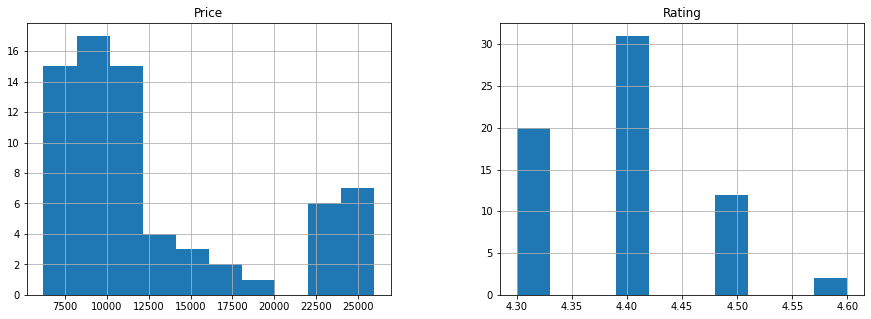

In [20]:
# Plotting Histograms of Price and Rating
df.hist(figsize=(15,5));

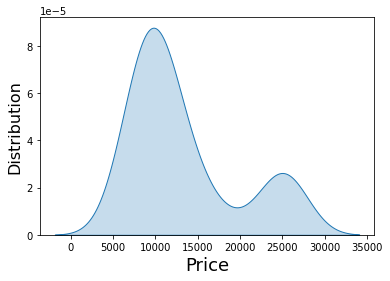

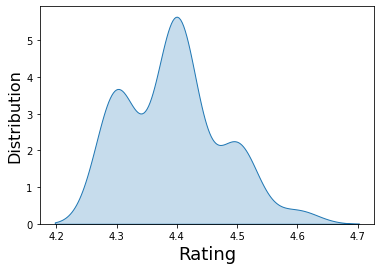

In [21]:
#Plot Distribution plots of price and rating
columns = ['Price', 'Rating']
for i in columns:
  sns.kdeplot(df[i], shade=True)
  plt.xlabel(i, fontsize=18)
  plt.ylabel('Distribution', fontsize=16)
  plt.show();

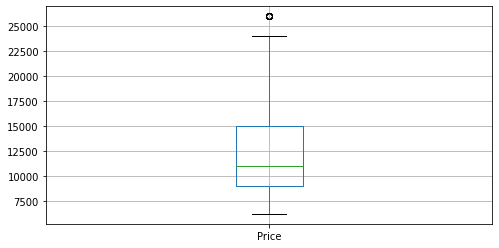

In [22]:
#Boxplot of Price
df.boxplot(column='Price', grid=True, figsize=(8,4));

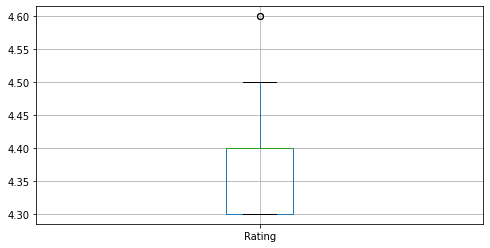

In [23]:
#Boxplot of Rating
df.boxplot(column='Rating', grid=True, figsize=(8,4));

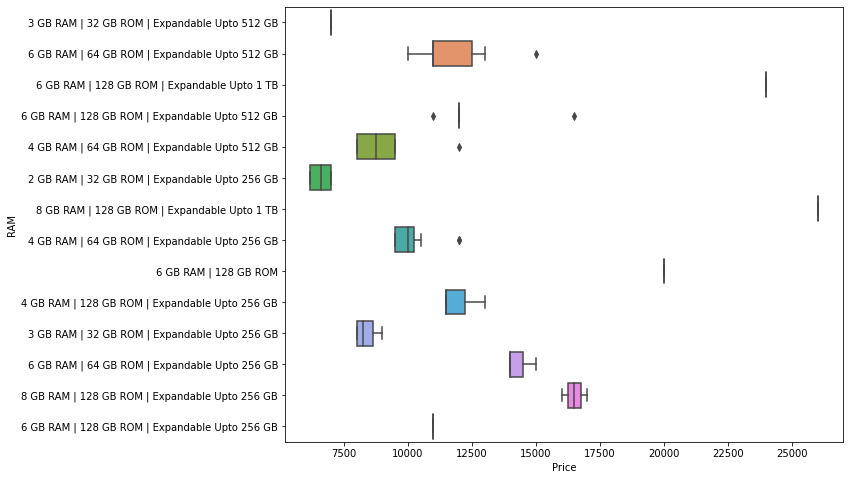

In [24]:
## Box plot of RAM
plt.figure(figsize=(10,8))
sns.boxplot(x='Price', y='RAM', data=df)
plt.show();

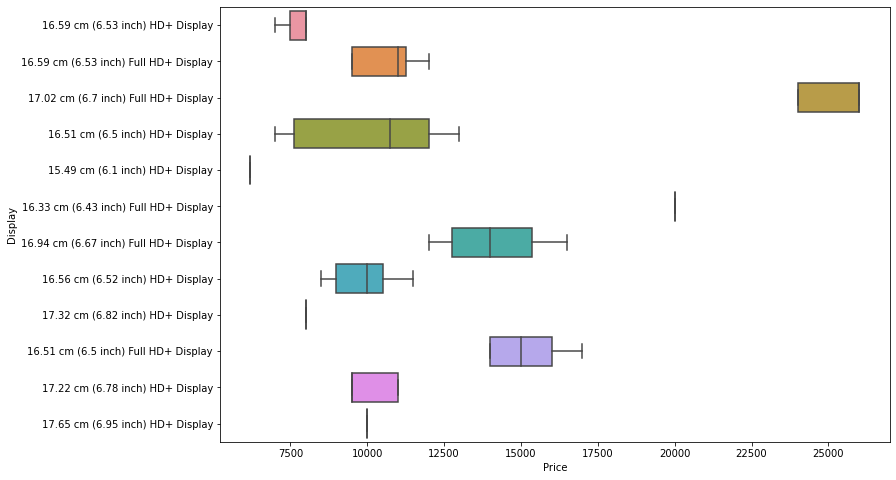

In [25]:
# Box plot of Display
plt.figure(figsize=(12,8))
sns.boxplot(x='Price', y='Display', data=df)
plt.show();

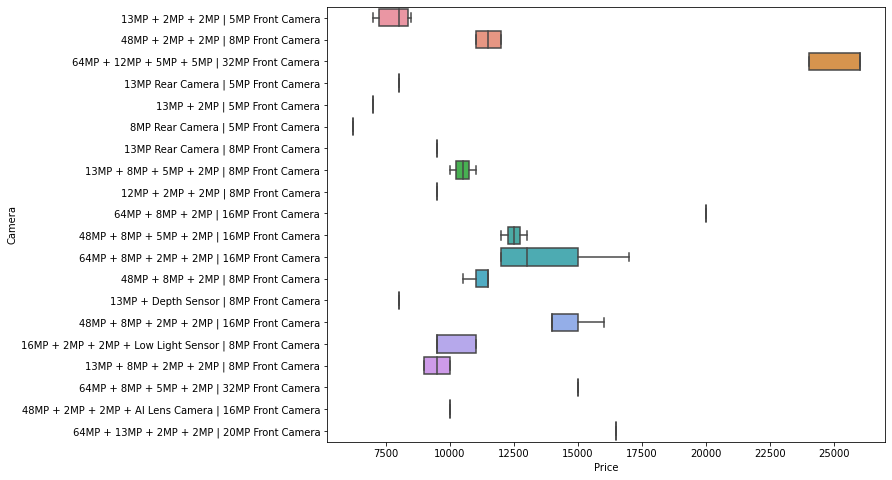

In [26]:
## Box plot for OS
plt.figure(figsize=(10,8))
sns.boxplot(x='Price', y='Camera', data=df)
plt.show();

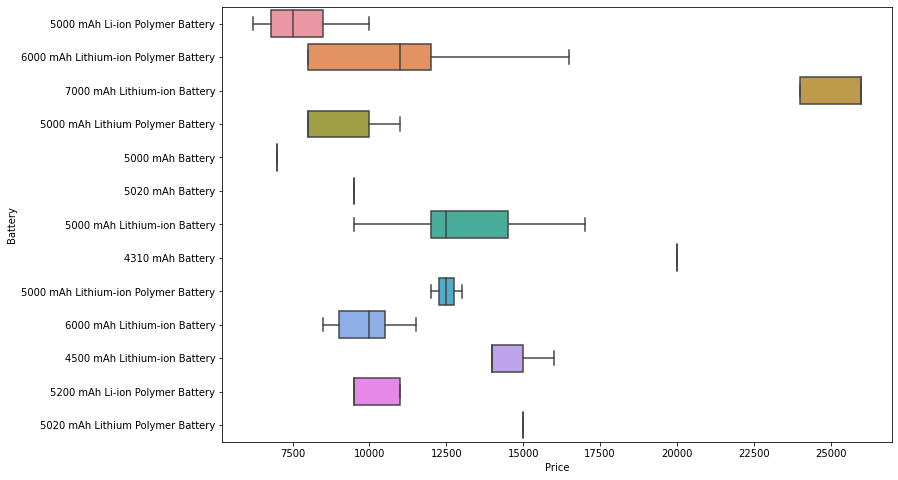

In [27]:
# Box plot of Display
plt.figure(figsize=(12,8))
sns.boxplot(x='Price', y='Battery', data=df)
plt.show();

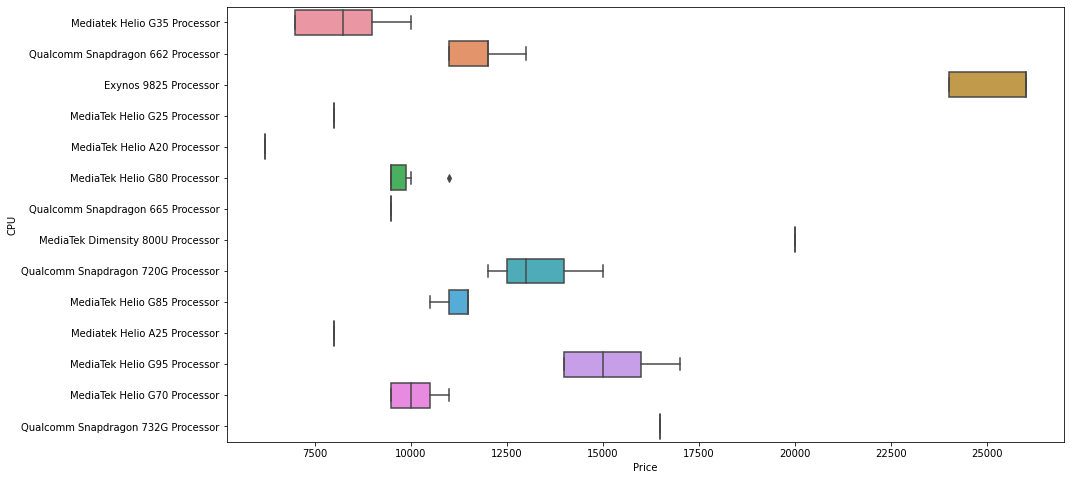

In [28]:
#Box plot of CPU
plt.figure(figsize=(15,8))
sns.boxplot(x='Price', y='CPU', data=df)
plt.show();

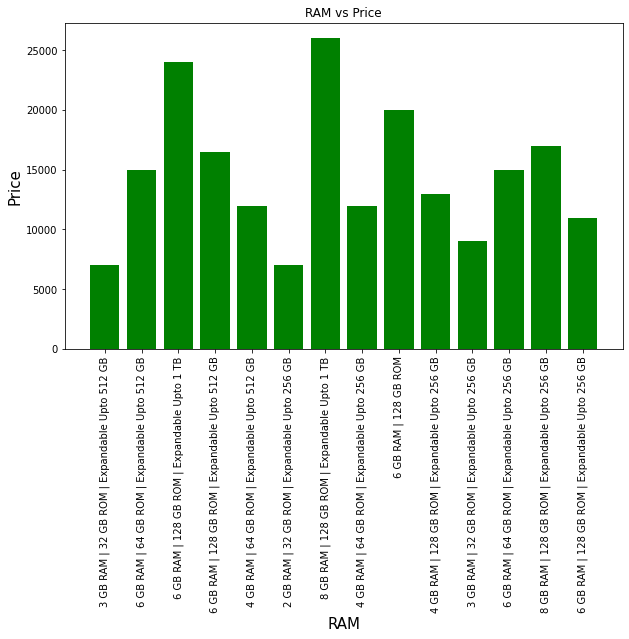

In [29]:
#Bar graph - RAM vs Price
plt.figure(figsize=(10,6))
plt.bar(df['RAM'], df['Price'], color='green')
plt.xticks(rotation=90)
plt.xlabel('RAM',size=15)
plt.ylabel('Price', size=15)
plt.title('RAM vs Price')
plt.show();

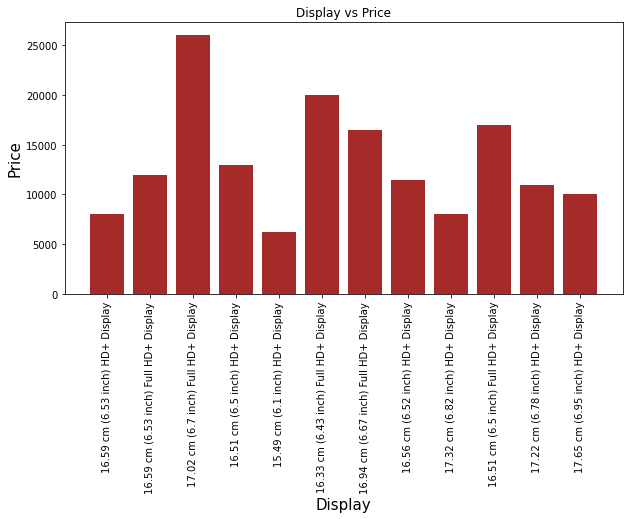

In [30]:
#Bar graph - Display vs Price
plt.figure(figsize=(10,5))
plt.bar(df['Display'], df['Price'], color='brown')
plt.xticks(rotation=90)
plt.xlabel('Display', size=15)
plt.ylabel('Price', size=15)
plt.title('Display vs Price')
plt.show();

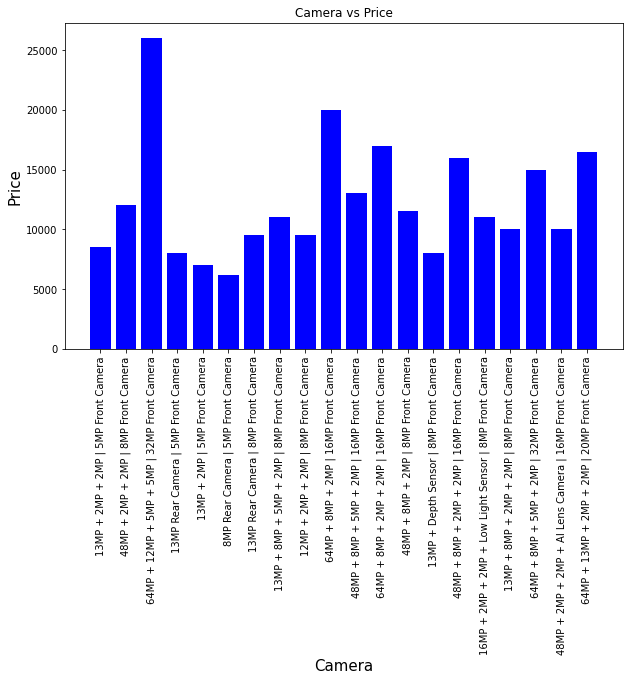

In [31]:
#Bar graph - Camera vs Price
plt.figure(figsize=(10,6))
plt.bar(df['Camera'], df['Price'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Camera', size=15)
plt.ylabel('Price', size=15)
plt.title('Camera vs Price')
plt.show();

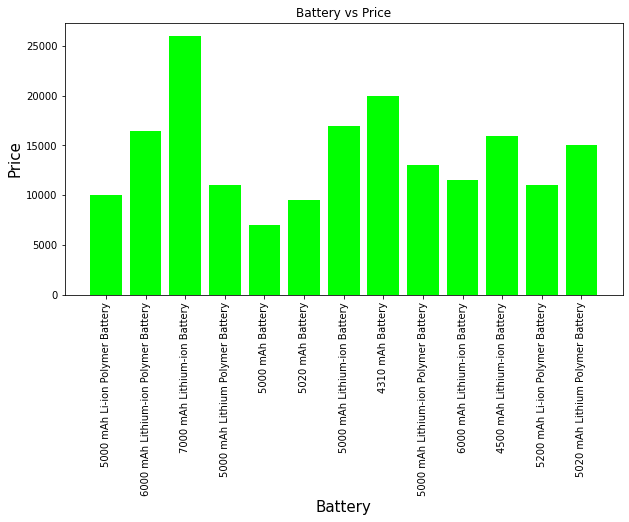

In [32]:
#Bar graph - Battery vs Price
plt.figure(figsize=(10,5))
plt.bar(df['Battery'], df['Price'], color='lime')
plt.xticks(rotation=90)
plt.xlabel('Battery', size=15)
plt.ylabel('Price', size=15)
plt.title('Battery vs Price')
plt.show();

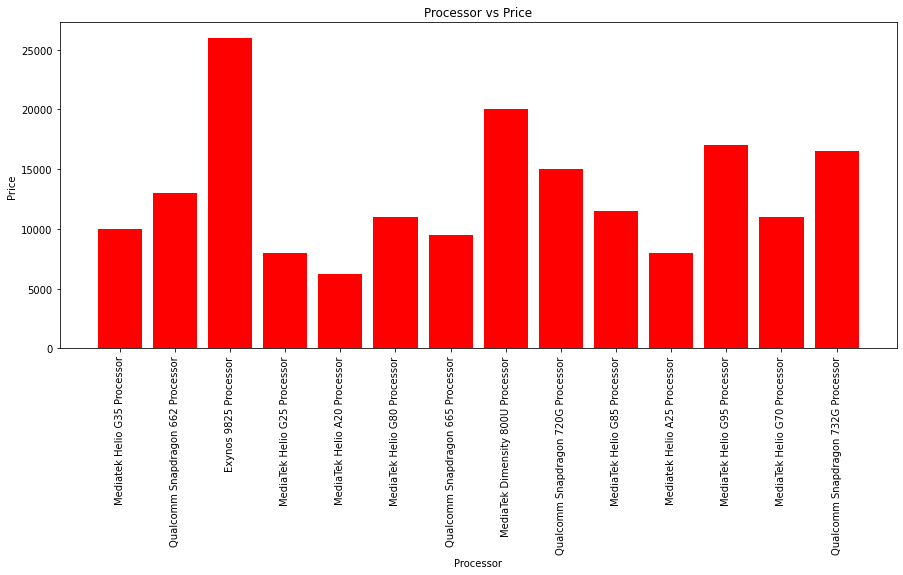

In [34]:
#Bar Graph - Processor vs Price
plt.figure(figsize=(15,6))
plt.bar(df['CPU'], df['Price'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Processor')
plt.ylabel('Price')
plt.title('Processor vs Price')
plt.show();

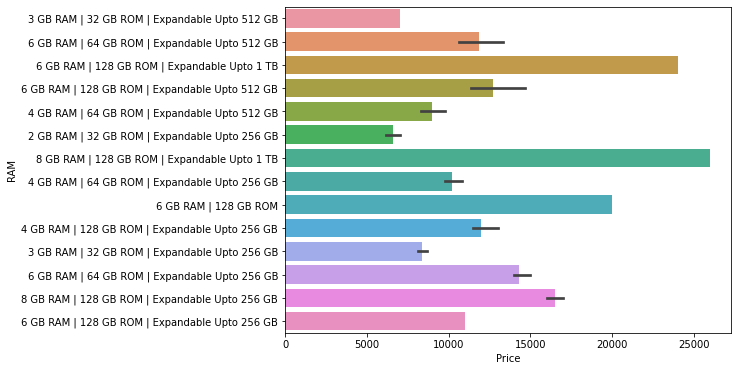

In [35]:
#Bar plot - Price vs RAM
plt.figure(figsize=(8,6))
sns.barplot(x=df.Price, y=df.RAM);

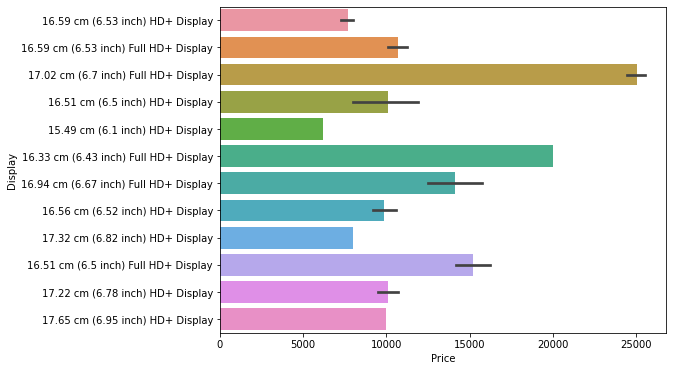

In [38]:
#Bar plot - Price vs Display
plt.figure(figsize=(8,6))
sns.barplot(x=df['Price'], y=df['Display']);

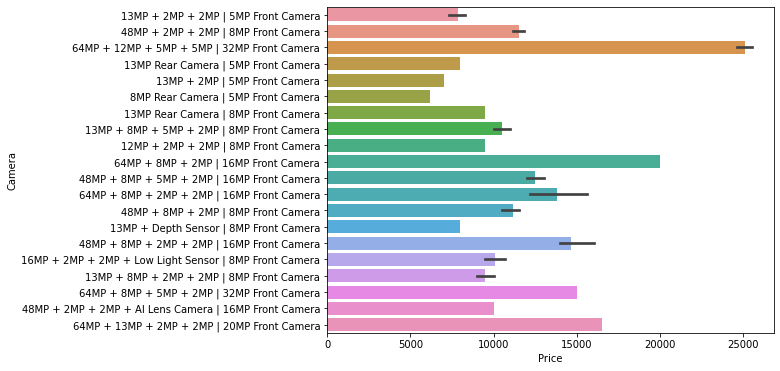

In [39]:
#Bar plot - Price vs Camera
plt.figure(figsize=(8,6))
sns.barplot(x=df['Price'], y=df['Camera']);

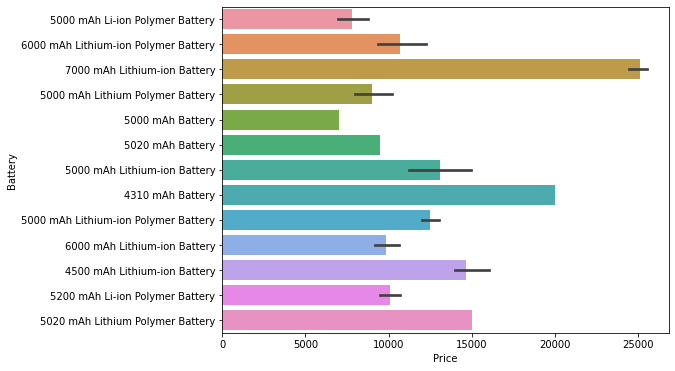

In [40]:
#Bar plot - Price vs Battery
plt.figure(figsize=(8,6))
sns.barplot(x=df['Price'], y=df['Battery']);

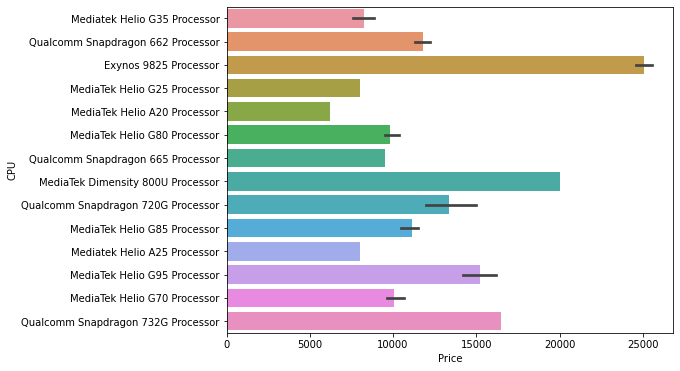

In [41]:
#Bar Plot - Price vs CPU
plt.figure(figsize=(8,6))
sns.barplot(x=df.Price, y=df.CPU);

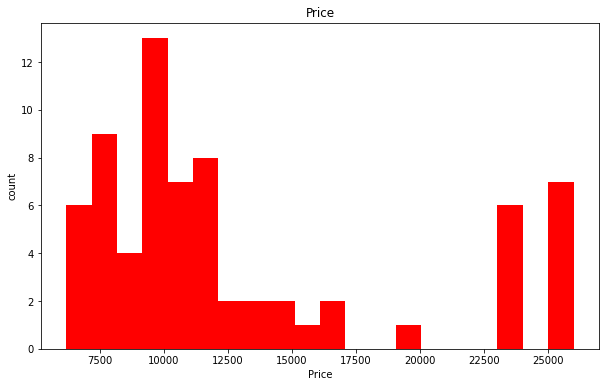

In [42]:
# Histogram plot
plt.figure(figsize=(10,6))
#Histogram for Price
plt.hist(df["Price"], bins=20, color='red')
plt.title("Price")
plt.xlabel("Price")
plt.ylabel("count");

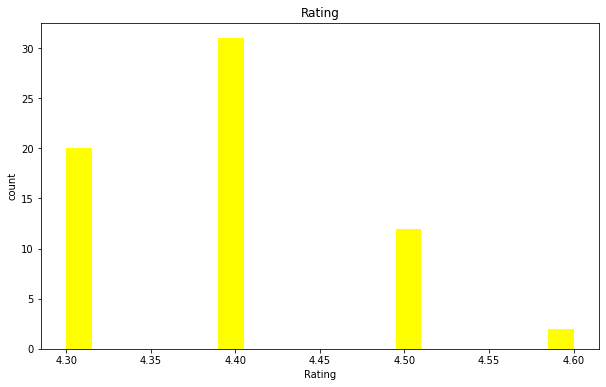

In [43]:
#Histogram for Rating
plt.figure(figsize=(10,6))
plt.hist(df["Rating"], bins=20, color="yellow")
plt.title("Rating")
plt.xlabel("Rating")
plt.ylabel("count");

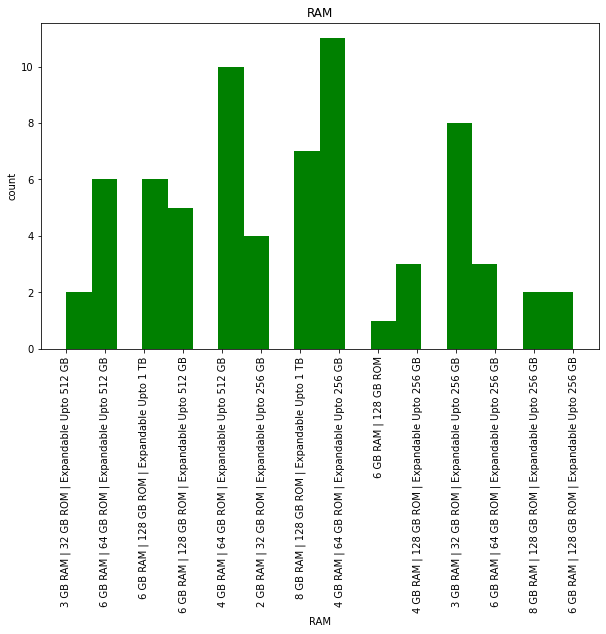

In [45]:
#Histogram for RAM
plt.figure(figsize=(10,6))
plt.hist(df["RAM"], bins=20, color="green")
plt.title("RAM")
plt.xticks(rotation=90)
plt.xlabel("RAM")
plt.ylabel("count");

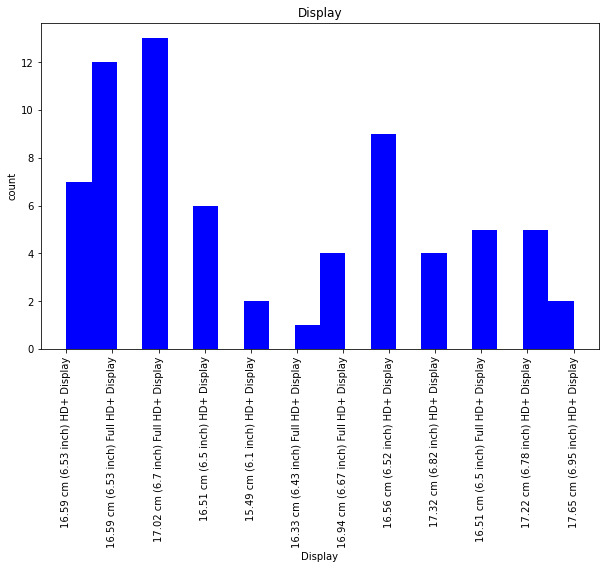

In [47]:
#Histogram for Display
plt.figure(figsize=(10,6))
plt.hist(df["Display"], bins=20, color="blue")
plt.title("Display")
plt.xticks(rotation=90)
plt.xlabel("Display")
plt.ylabel("count");

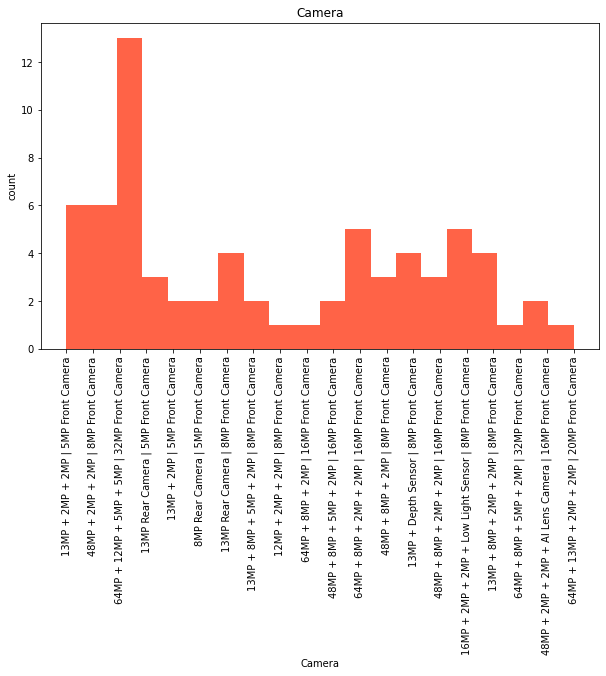

In [48]:
#Histogram for Camera
plt.figure(figsize=(10,6))
plt.hist(df["Camera"], bins=20, color="tomato")
plt.title("Camera")
plt.xticks(rotation=90)
plt.xlabel("Camera")
plt.ylabel("count");

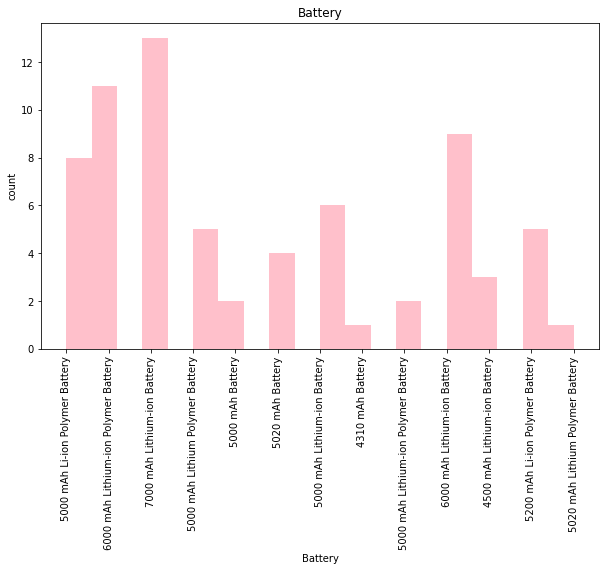

In [49]:
#Histogram for Battery
plt.figure(figsize=(10,6))
plt.hist(df["Battery"], bins=20, color="pink")
plt.title("Battery")
plt.xticks(rotation=90)
plt.xlabel("Battery")
plt.ylabel("count");

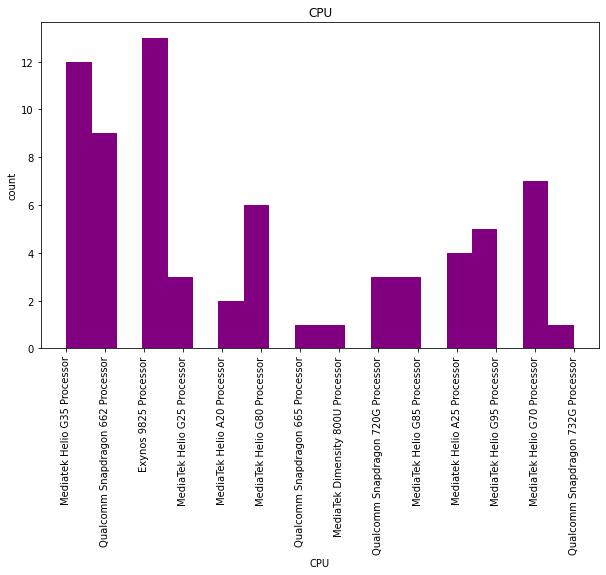

In [50]:
#Histogram for CPU
plt.figure(figsize=(10,6))
plt.hist(df["CPU"], bins=20, color="purple")
plt.title("CPU")
plt.xticks(rotation=90)
plt.xlabel("CPU")
plt.ylabel("count");

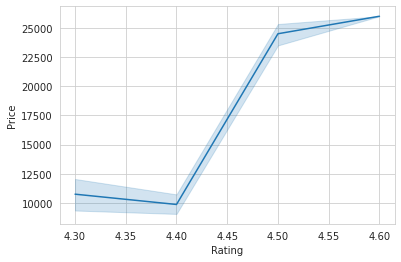

In [51]:
#Line Plot
sns.set_style("whitegrid")
sns.lineplot(x=df['Rating'], y=df['Price']);

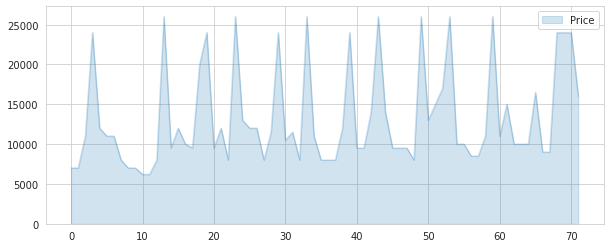

In [53]:
#plot of area for Price
sns.set_style("whitegrid")
df.plot(kind='area', y=['Price'], alpha= 0.2, figsize= (10,4), stacked=False);

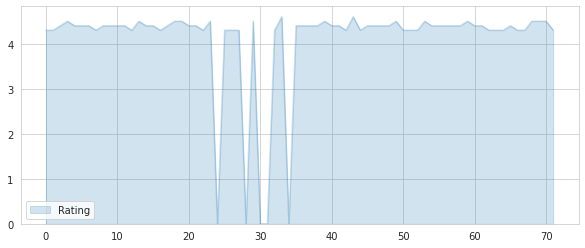

In [54]:
#plot of area for Price
sns.set_style("whitegrid")
df.plot(kind='area', y=['Rating'], alpha= 0.2, figsize= (10,4), stacked=False);

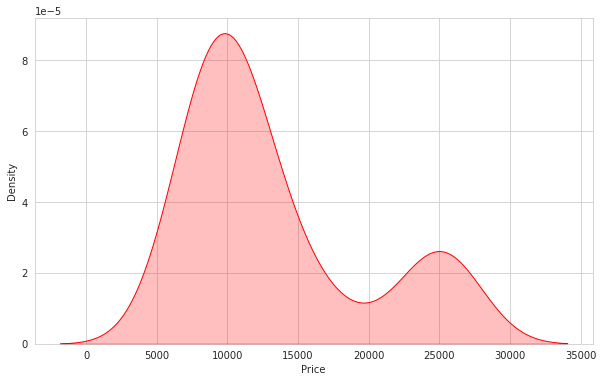

In [55]:
#plot of density of Price- kde (kernal density estimation plot)
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
#df.plot(kind='kde', y=['Price','Rating'], alpha= 0.8, figsize= (10,4), stacked=False, );

sns.kdeplot(data=df, x='Price', color='r', shade=True, Label='Price');

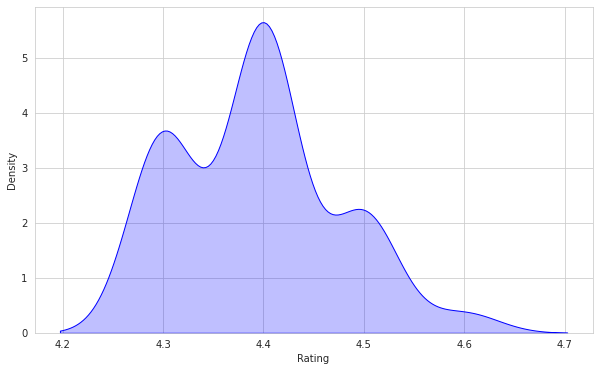

In [56]:
#plot of density of Rating - kde (kernal density estimation plot)
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.kdeplot(data=df, x='Rating', color='b', shade=True, Label='Rating');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


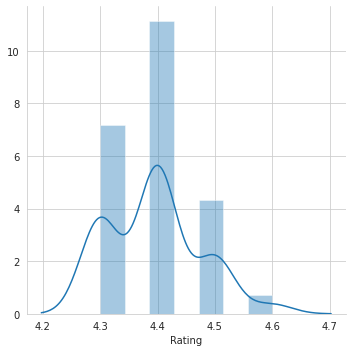

In [57]:
#Plotting Histogram with Density plot for Rating
sns.FacetGrid(data=df, height=5) \
   .map(sns.distplot, "Rating")
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


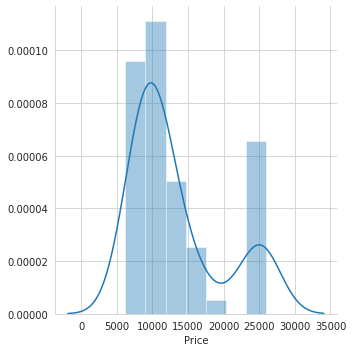

In [58]:
#Plotting Histogram with Density plot for Price
sns.FacetGrid(data=df, height=5) \
   .map(sns.distplot, "Price")
plt.show();

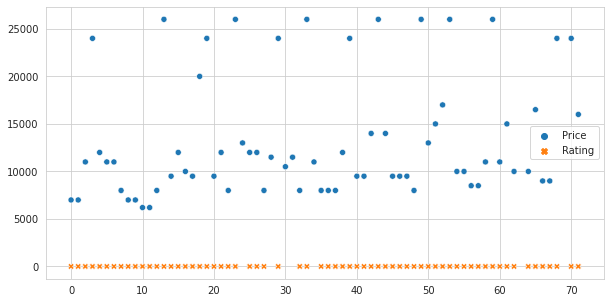

In [59]:
# Scatter Plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df);

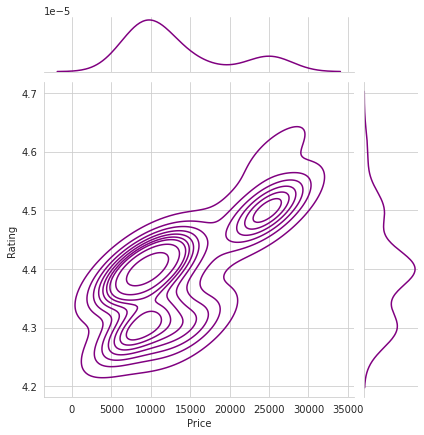

In [60]:
sns.jointplot(x="Price", y="Rating", data=df, kind="kde", space=0.2, color='purple');

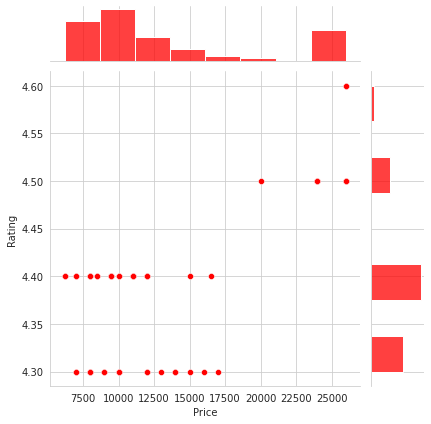

In [61]:
sns.jointplot(data=df, x="Price",y= "Rating", kind='scatter', color='red');

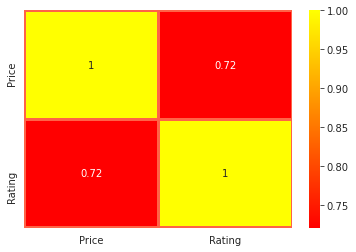

In [62]:
sns.heatmap(df.corr(), cmap="autumn", linecolor="tomato", linewidths=2, annot=True);

**Conclusion**
  
We can conclude from here that products with lower price have a higher ratings to some extent.